In [35]:
from typing import Tuple, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from matplotlib.axes import Axes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pickle

In [36]:
from sklearn.pipeline import Pipeline

df: pd.DataFrame = pd.read_csv("database.csv",
                               index_col=0)
print(df.columns)

df:np.ndarray = df.values

Index(['Price', 'Number of rooms', 'Area', 'Fully equipped kitchen',
       'Furnished', 'Open fire', 'Terrace Area', 'Garden',
       'Surface of the land', 'Number of facades', 'Swimming pool',
       'Type of property_house', 'State of the building_to renovate',
       'State of the building_new', 'lat', 'lng'],
      dtype='object')


In [37]:
X: np.ndarray = pd.DataFrame(df).drop(columns=[0]).values
y: np.ndarray = df[:, 0].flatten()
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(70340, 15) (70340,)


In [38]:
params = {'random_state': 42, 'n_estimators': 604, 'max_depth': 8, 'learning_rate': 0.07137287160659607,
 'gamma': 0.42182404638273713, 'colsample_bytree': 0.5178480668480605}

# 0.87868669132923
# 0.7210963293130916

steps: List[Tuple] = [
    # ("imputer", KNNImputer(n_neighbors=10)),
    # ("reg", GradientBoostingRegressor(**params)),)
    ("reg", xgb.XGBRegressor(tree_method="gpu_hist", gpu_id=0, **params)),]

pipe: Pipeline = Pipeline(steps=steps)

pipe.fit(X_train, y_train)
with open('model.pkl','wb') as f:
    pickle.dump(pipe,f)

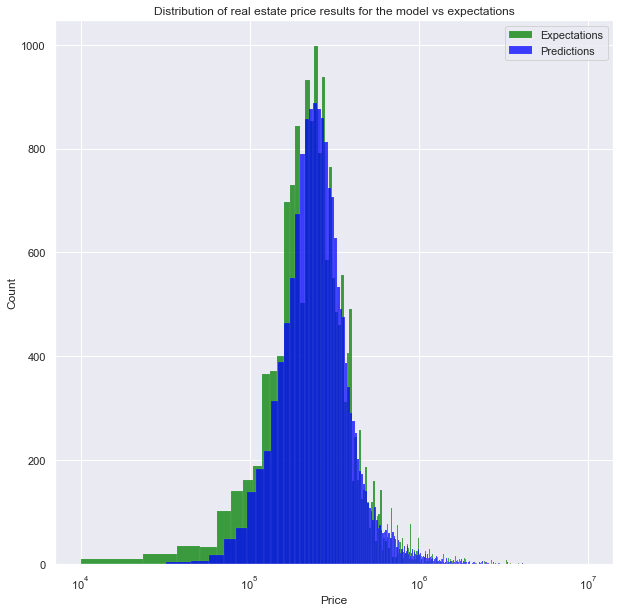

In [39]:
sns.set("notebook", style="darkgrid")
preds = pipe.predict(X_test)

results: pd.DataFrame = pd.DataFrame(np.array(list(zip(preds, y_test))), columns=("Predictions", "Expectations"))
results.sort_values("Predictions").reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 10), dpi=72)
sns.histplot(data=results["Expectations"], label="Expectations", color="Green")
sns.histplot(data=results["Predictions"], label="Predictions", color="Blue")
plt.xscale("log")
plt.xlabel("Price")
plt.title("Distribution of real estate price results for the model vs expectations")
plt.legend()

In [40]:
print(f"Training score: {pipe.score(X_train, y_train)}")
print(f"Test score: {pipe.score(X_test, y_test)}")
print(f"MSE: {mean_squared_error(y_test, pipe.predict(X_test))}")
print(f"MedSE: {np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))}")
print(f"MAE: {mean_absolute_error(y_test, pipe.predict(X_test))}")

Training score: 0.9590479986844843
Test score: 0.79488697635022
MSE: 30236741392.019257
MedSE: 173887.15131377376
MAE: 78291.92208358509


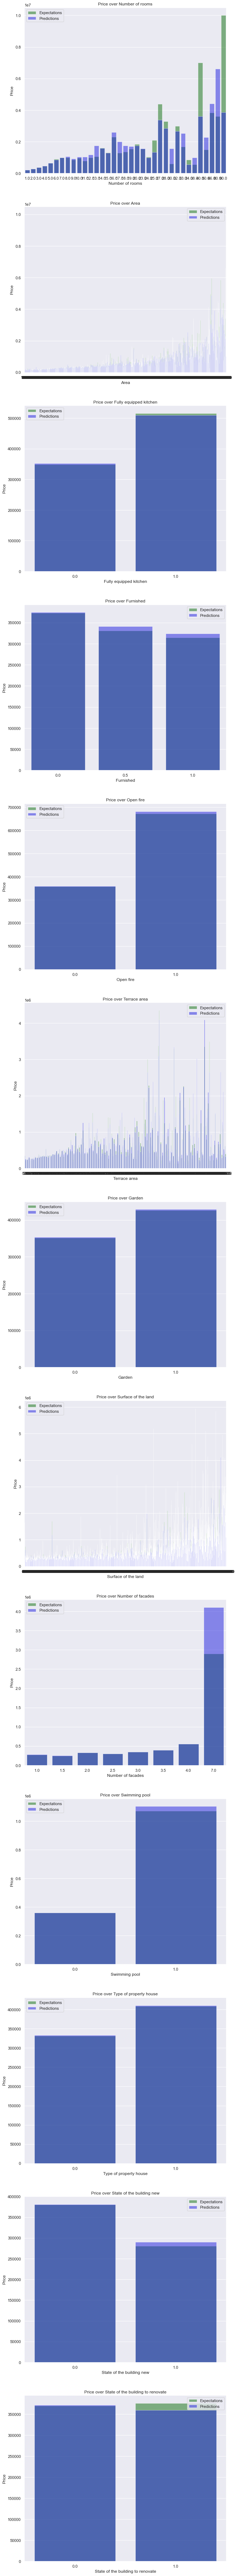

In [41]:
fig: plt.Figure = plt.figure(figsize=(10, (X_train.shape[1] + 1) * 10), dpi=72)
gs: plt.GridSpec = fig.add_gridspec(X_train.shape[1] + 1, 1)
for i, column in enumerate(['Number of rooms', 'Area',
                            'Fully equipped kitchen', 'Furnished', 'Open fire', 'Terrace Area',
                            'Garden',
                            'Surface of the land', 'Number of facades',
                            'Swimming pool', 'Type of property_house',
                            'State of the building_new', 'State of the building_to renovate',]):
    ax: Axes = fig.add_subplot(gs[i])
    sns.barplot(x=X_test[:, i], y=y_test, color="green", estimator=np.mean, ci=None, label="Expectations", alpha=0.5,
    ax = ax)
    sns.barplot(x=X_test[:, i], y=preds, color="blue", estimator=np.mean, ci=None, label="Predictions", alpha=0.5,
    ax = ax)
    ax.set_title(f"Price over {column.replace('_', ' ').capitalize()}")
    ax.set_ylabel("Price")
    # ax.set_yscale("log")
    # if i in (1,2,7,9,):
    #     ax.set_xscale("log")
    ax.set_xlabel(column.replace('_', ' ').capitalize())
    ax.legend()

In [42]:
data = pd.DataFrame(np.zeros((1,15)), columns =['Number of rooms', 'Area',
       'Fully equipped kitchen', 'Furnished', 'Open fire',
       'Terrace Area', 'Garden', 'Surface of the land', 'Number of facades',
       'Swimming pool', 'Type of property_house',
       'State of the building_to renovate', 'State of the building_new', 'lat', 'lng'])

data["Area"] = 70
data["Number of rooms"] = 1
data["Fully equipped kitchen"] = 1
data["Number of facades"] = 2
data["lat"]  = 50.8427501
data["lng"] = 4.3515499

print(data.shape)

pipe.predict(data.values)

#

(1, 15)


array([279053.97], dtype=float32)